In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [11]:
%pwd

'/content/drive/My Drive/ColabNote/홍채인식/pictures'

In [0]:
#필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

In [13]:
# 드라이브에 있는 사진 이름 가져오기
import glob
images=sorted(glob.glob("*.bmp"))   #1890개의 파일 이름 담겨져있음

print(images)
print(len(images))

['iris_001_01.bmp', 'iris_001_02.bmp', 'iris_001_03.bmp', 'iris_001_04.bmp', 'iris_001_05.bmp', 'iris_001_06.bmp', 'iris_001_07.bmp', 'iris_001_08.bmp', 'iris_001_09.bmp', 'iris_001_10.bmp', 'iris_002_01.bmp', 'iris_002_02.bmp', 'iris_002_03.bmp', 'iris_002_04.bmp', 'iris_002_05.bmp', 'iris_002_06.bmp', 'iris_002_07.bmp', 'iris_002_08.bmp', 'iris_002_09.bmp', 'iris_002_10.bmp', 'iris_003_01.bmp', 'iris_003_02.bmp', 'iris_003_03.bmp', 'iris_003_04.bmp', 'iris_003_05.bmp', 'iris_003_06.bmp', 'iris_003_07.bmp', 'iris_003_08.bmp', 'iris_003_09.bmp', 'iris_003_10.bmp', 'iris_004_01.bmp', 'iris_004_02.bmp', 'iris_004_03.bmp', 'iris_004_04.bmp', 'iris_004_05.bmp', 'iris_004_06.bmp', 'iris_004_07.bmp', 'iris_004_08.bmp', 'iris_004_09.bmp', 'iris_004_10.bmp', 'iris_005_01.bmp', 'iris_005_02.bmp', 'iris_005_03.bmp', 'iris_005_04.bmp', 'iris_005_05.bmp', 'iris_005_06.bmp', 'iris_005_07.bmp', 'iris_005_08.bmp', 'iris_005_09.bmp', 'iris_005_10.bmp', 'iris_006_01.bmp', 'iris_006_02.bmp', 'iris_006_0

In [0]:
images[0]

'iris_001_01.bmp'

In [0]:
# 총 189개 = 120(학습) + 69(테스트)
# 파일 이름 train set과 test set으로 나누기
# 학습 % 1~120  ==> PCA()실행에 사용
# 테스트 % 122~190 ==> PCA()의 components_ 활용해 인식
fname_train=[]          #trainset에 들어갈 파일 이름들
fname_test=[]           #testset에 들어갈 파일 이름들

for i in range(0, 1890):
  if((i>=0*10 and i<120*10)):
    fname_train.append(images[i])
  elif((i>=120*10 and i<190*10)):
    fname_test.append(images[i])

In [15]:
print(len(fname_train))
len(fname_test)

1200


690

In [0]:
# 데이터셋 만들기
iris_train=[]              # 학습 데이터 셋 들어있는 행렬
iris_test=[]               # 테스트 데이터 셋 들어있는 행렬

def make_train(filename):
  img=img_as_float(imread(filename))      # 파일 이름이 filename인 사진 데이터 가져오기
  temp=[]
  for i in range(0, 32):
    for j in range(0, 226):
      temp.append(img[i][j])        # 32X226 -> 1X7232
  iris_train.append(temp)

def make_test(filename):
  img=img_as_float(imread(filename))      # 파일 이름이 filename인 사진 데이터 가져오기
  temp=[]
  for i in range(0, 32):
    for j in range(0, 226):
      temp.append(img[i][j])        # 32X226 -> 1X7232
  iris_test.append(temp)

In [0]:
# 데이터셋 만들기
for i in range(0, 1200):
  make_train(fname_train[i])

for i in range(0, 690):
  make_test(fname_test[i])

In [24]:
print(len(iris_train))     #1200개 = 학습데이터
len(iris_test)             #690개 = 테스트데이터

1200


690

In [0]:
iris_test[0]

(1200, 1200)


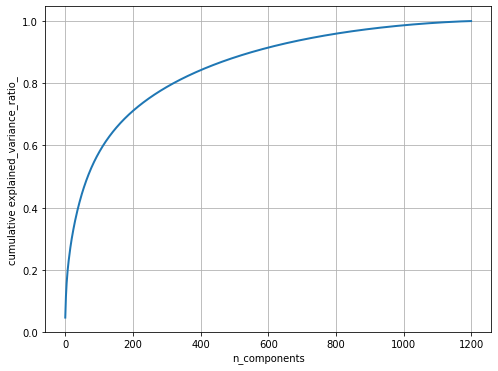

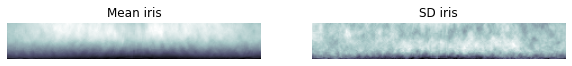

In [25]:
# 적정 주성분 수 찾기
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 1200        #학습 데이터 대상으로 찾을 것이므로
#평균 및 분산 관련 계산은 StandardScaler()로 계산
#주성분 찾는 것은 PCA()로 계산
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_comp))])
iris_proj = pipeline.fit_transform(iris_train)                                  #학습 데이터 1200개 주성분으로 투영
print(iris_proj.shape)

mean_iris = np.reshape(pipeline.named_steps['scaling'].mean_, (32,226))          # 각 얼굴의 화소/인덱스별로 평균 계산
sd_iris = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (32,226))    #얼굴의 차이값(각 얼굴 화소  - 해당 화소/인덱스의 평균) 

#고유값 누적해서 그래프로 보여주기
pylab.figure(figsize=(8, 6))
variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

#meaniris, sdiris 보여주기
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_iris, cmap='bone')
pylab.axis('off'), pylab.title('Mean iris')
pylab.subplot(122), pylab.imshow(sd_iris, cmap='bone')
pylab.axis('off'), pylab.title('SD iris')
pylab.show()

In [26]:
# 적정 주성분 수 찾기
pca = PCA(0.9)

#학습 데이터 faces_train에 대해 PCA() 실행
pca.fit(iris_train) 

#pca = PCA(0.9)로 찾은 적정수 확인
print(pca.n_components_) #n_components 일 때의 적용된 주성분 수

548


In [27]:
print(pca.components_.shape)

(548, 7232)


In [28]:
# 90%의 설명력 가지는 주성분 수 = 548개

n_comp = 548
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_comp))])
iris_proj = pipeline.fit_transform(iris_train)
print(iris_proj.shape)

mean_iris = np.reshape(pipeline.named_steps['scaling'].mean_, (32,226))
sd_iris = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (32,226))


variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
variance_ratio      # 상위 548개의 기여도

(1200, 548)


array([0.04626878, 0.03949673, 0.02955766, 0.02409596, 0.01686677,
       0.01525783, 0.01388286, 0.01263664, 0.01111206, 0.0103046 ,
       0.00937855, 0.00899125, 0.00873557, 0.0085065 , 0.00825757,
       0.00790739, 0.00771271, 0.00748766, 0.00663087, 0.00651074,
       0.00643544, 0.00627416, 0.0060678 , 0.00594293, 0.00585422,
       0.00578469, 0.00557203, 0.00552061, 0.00541277, 0.00515284,
       0.00503623, 0.00495847, 0.00491755, 0.0048703 , 0.00470579,
       0.0046801 , 0.00456917, 0.0044719 , 0.00435694, 0.00432843,
       0.0042533 , 0.00416264, 0.0040606 , 0.00405668, 0.00401184,
       0.00389452, 0.00384059, 0.00381212, 0.00376751, 0.00370526,
       0.00363303, 0.00351147, 0.00348448, 0.00340088, 0.00339617,
       0.00332213, 0.00329611, 0.00325232, 0.00320578, 0.00315955,
       0.00313483, 0.00307096, 0.00299953, 0.00298292, 0.00296591,
       0.00289365, 0.00284823, 0.00282391, 0.00279198, 0.00275576,
       0.00273537, 0.00270048, 0.00268326, 0.0026382 , 0.00259

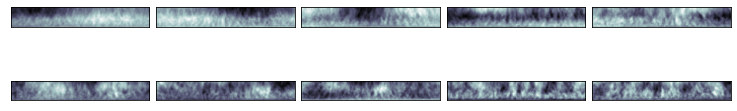

In [29]:
#상위 10개 고유홍채
'''
print('예를 들어, 1번째 주성분:', pca.components_[1, :])
print('1개의 주성분 크기: ', len(pca.components_[1, :]))
'''

fig = pylab.figure(figsize=(10,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    iris = np.reshape(pca.components_[i, :], (32, 226))
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(iris, cmap='bone')
pylab.show()

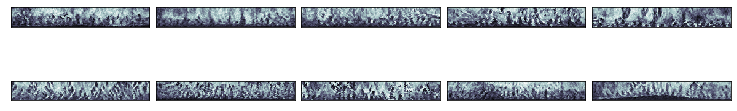

In [30]:
# 홍채 재구성
iris_inv_proj = pipeline.named_steps['pca'].inverse_transform(iris_proj)  # projection 시켰던 것을 다시 얼굴 영역으로 가져옴
iris_inv_proj = np.reshape(iris_inv_proj, (1200, 32, 226))  # 1200개를 32X226로 reshape

fig = pylab.figure(figsize=(10,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

j = 1
np.random.seed(0) # 매번 같은 임의값 지정 위해
for i in np.random.choice(range(1200), 10):      #랜덤으로 10개만 뽑아봄
    reconst_iris = mean_iris + sd_iris * iris_inv_proj[i, :]   # i번째 얼굴 완성! 살 다시 붙이기
    ax = fig.add_subplot(2, 5, j, xticks=[], yticks=[])
    ax.imshow(reconst_iris, cmap='bone', interpolation='nearest')
    j += 1

pylab.show()

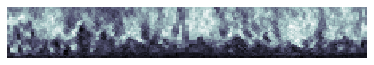

=
0.046268781770018245 X


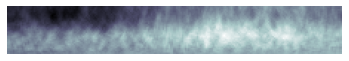

+
0.03949673333980608 X


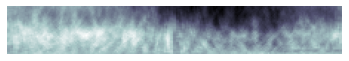

+...+


In [31]:
# 고유분해
fig = pylab.figure(figsize=(5,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
reconst_iris = mean_iris + sd_iris * iris_inv_proj[0, :]   # i번째 얼굴 완성! 살 다시 붙이기
pylab.imshow(reconst_iris, cmap='bone', interpolation='nearest')
pylab.axis('off')
pylab.show()
print("=")

print(variance_ratio[0], 'X')
iris = np.reshape(pca.components_[0, :], (32, 226))
pylab.imshow(iris, cmap='bone')
pylab.axis('off')
pylab.show()

print("+")
print(variance_ratio[1], 'X')
iris = np.reshape(pca.components_[1, :], (32, 226))
pylab.imshow(iris, cmap='bone')
pylab.axis('off')
pylab.show()

print("+...+")

In [0]:
# 테스트 데이터 특징벡터 추출하기
# 테스트 % 122~190 => 69*10개
# ID 69개, 각 ID당 10개의 샘플

newiris_proj = pca.transform(iris_test) 

In [0]:
newiris_proj[0]

In [0]:
# 테스트 데이터의 특징벡터 간 거리 구하기

dist=[]
for i in range(0, 690):
  for j in range(0, 690):
    distance=np.sqrt(np.sum((newiris_proj[i]-newiris_proj[j])**2))
    dist.append(distance)

In [34]:
dist_test=np.array(dist).reshape((690, 690))
print(dist_test.shape)
dist_test

(690, 690)


array([[ 0.        , 15.10008424, 12.78208738, ..., 22.97409437,
        22.70453771, 23.41490653],
       [15.10008424,  0.        , 11.43758031, ..., 23.27508519,
        22.50270057, 23.51317532],
       [12.78208738, 11.43758031,  0.        , ..., 22.92562937,
        22.24256559, 23.48138537],
       ...,
       [22.97409437, 23.27508519, 22.92562937, ...,  0.        ,
        11.67613088, 13.21465188],
       [22.70453771, 22.50270057, 22.24256559, ..., 11.67613088,
         0.        , 16.8399824 ],
       [23.41490653, 23.51317532, 23.48138537, ..., 13.21465188,
        16.8399824 ,  0.        ]])

In [0]:
# test data target set
# 테스트 % 122~190 => 69*10개

target=[]
for i in range(122, 191):
  for j in range(1, 11):
    target.append(i)

In [0]:
print(target[0])
print(len(target))

122
690


In [0]:
# test 데이터
# % 122~190 => 69*10개

In [0]:
# 쿼리 데이터 01  vs  02, 03, 04, 05, 06, 07, 08, 09, 10
# identification 함수

def identification(target, dist_test):
  match=0
  for i in range(0, 69):
    qu_ID_1=target[10*i]
    index=np.argsort(dist_test[10*i])
    min_ID_1=target[index[1]]
    if(qu_ID_1==min_ID_1):
      match+=1

  print("result : ", (match/69)*100)

In [37]:
identification(target, dist_test)

result :  97.10144927536231


In [0]:
# 쿼리 데이터 01, 02  vs  03, 04, 05, 06, 07, 08, 09, 10
# identification 함수

def identification2(target, dist_test):
  iden=0
  match1=0
  match2=0
  for i in range(0, 69):
    qu_ID_1=target[10*i]
    index=np.argsort(dist_test[10*i])
    min_ID_1=target[index[1]]
    if(qu_ID_1==min_ID_1):
      match1+=1
  iden+=(match1/69)*100

  for i in range(0, 69):
    qu_ID_2=target[10*i+1]
    index=np.argsort(dist_test[10*i+1])
    min_ID_2=target[index[1]]
    if(qu_ID_2==min_ID_2):
      match2+=1
  iden+=(match2/69)*100

  print("result : ", iden/2)

In [39]:
identification2(target, dist_test)

result :  98.55072463768116


In [0]:
# 쿼리 데이터 01  vs  02, 03, 04, 05, 06, 07, 08, 09, 10
# verification 함수

def verification(target, dist_test):
  match=0
  for i in range(0, 69):
    cnt=0
    qu_ID=target[10*i]
    index=np.argsort(dist_test[10*i])            #dist_test를 오름차순으로 정렬한 후 해당되는 index 배열
    for j in range(1, 10):
      if(qu_ID == target[index[j]]):            #거리가 최소인 ID 9개 비교, index[0]은 자기자신이므로 뺀다
        cnt+=1
    match+=((cnt/9)*100)

  print("result : ", match/69)

In [41]:
verification(target, dist_test)

result :  93.88083735909822


In [0]:
# 쿼리 데이터 01, 02  vs  03, 04, 05, 06, 07, 08, 09, 10
# verification

def verification2(target, dist_test):
  very=0
  match1=0
  match2=0
  for i in range(0, 69):
    cnt=0
    qu_ID_1=target[10*i]
    index=np.argsort(dist_test[10*i])            #dist_test를 오름차순으로 정렬한 후 해당되는 index 배열
    for j in range(1, 10):
      if(qu_ID_1 == target[index[j]]):            #거리가 최소인 ID 9개 비교, index[0]은 자기자신이므로 뺀다
        cnt+=1
    match1+=((cnt/9)*100)
  very+=match1/69

  for i in range(0, 69):
    cnt=0
    qu_ID_2=target[10*i+1]
    index=np.argsort(dist_test[10*i+1])            #dist_test를 오름차순으로 정렬한 후 해당되는 index 배열
    for j in range(1, 10):
      if(qu_ID_2 == target[index[j]]):            #거리가 최소인 ID 9개 비교, index[0]은 자기자신이므로 뺀다
        cnt+=1
    match2+=((cnt/9)*100)
  very+=match2/69

  print("result : ", very/2)

In [43]:
verification2(target, dist_test)

result :  94.20289855072463


In [0]:
# 거리별 결정 임계치 = 5, 10, 15, 20, 25, 30, 35
Dth=[5, 10, 15, 20, 25, 30, 35]

In [0]:
# FAR

def FAR(Dth, target, dist_test):
  match=0
  for i in range(0, 69):
    dist_cnt=0
    ID_cnt=0

    qu_ID=target[10*i]
    for j in range(0, 690):
      if(dist_test[10*i][j] < Dth):
        dist_cnt+=1
        if(qu_ID != target[j]):
          ID_cnt+=1
    dist_cnt-=1                     #자기 자신 빼야하므로
    if(dist_cnt > 0):
      match+=(ID_cnt/dist_cnt*100)

  print("result : ", match/69)

In [47]:
for i in Dth:
  print(f"임계치가 {i} 일 때 ", end='')
  FAR(i, target, dist_test)

임계치가 5 일 때 result :  0.0
임계치가 10 일 때 result :  0.0
임계치가 15 일 때 result :  2.2141030325173547
임계치가 20 일 때 result :  86.88673023426287
임계치가 25 일 때 result :  98.43588947815762
임계치가 30 일 때 result :  98.68290345626463
임계치가 35 일 때 result :  98.69359341280611


In [0]:
# FAR2

def FAR2(Dth, target, dist_test):
  match=0
  for i in range(0, 69):
    dist_cnt=0
    ID_cnt=0

    qu_ID=target[10*i]
    for j in range(0, 690):
      if(dist_test[10*i][j] < Dth):
        dist_cnt+=1
        if(qu_ID != target[j]):
          ID_cnt+=1
    dist_cnt-=1                     #자기 자신 빼야하므로
    if(dist_cnt > 0):
      match+=(ID_cnt/dist_cnt*100)

  for i in range(0, 69):
    dist_cnt=0
    ID_cnt=0

    qu_ID_2=target[10*i+1]
    for j in range(0, 690):
      if(dist_test[10*i+1][j] < Dth):
        dist_cnt+=1
        if(qu_ID_2 != target[j]):
          ID_cnt+=1
    dist_cnt-=1                     #자기 자신 빼야하므로
    if(dist_cnt > 0):
      match+=(ID_cnt/dist_cnt*100)

  print("result : ", match/(69*2))

In [49]:
for i in Dth:
  print(f"임계치가 {i} 일 때 ", end='')
  FAR2(i, target, dist_test)

임계치가 5 일 때 result :  0.0
임계치가 10 일 때 result :  0.0
임계치가 15 일 때 result :  2.313996744943037
임계치가 20 일 때 result :  87.80658473988849
임계치가 25 일 때 result :  98.38722909267794
임계치가 30 일 때 result :  98.67909638049957
임계치가 35 일 때 result :  98.69350993433345


In [0]:
# FRR

def FRR(Dth, target, dist_test):
  match=0
  for i in range(0, 69):
    dist_cnt=0
    ID_cnt=0

    qu_ID=target[10*i]
    for j in range(0, 690):
      if(dist_test[10*i][j] > Dth):
        dist_cnt+=1
        if(qu_ID == target[j]):
          ID_cnt+=1
    if(dist_cnt > 0):
      match+=(ID_cnt/dist_cnt*100)

  print("result : ", match/69)

In [51]:
for i in Dth:
  print(f"임계치가 {i} 일 때 ", end='')
  FRR(i, target, dist_test)

임계치가 5 일 때 result :  1.3041619400243494
임계치가 10 일 때 result :  0.8690888029877681
임계치가 15 일 때 result :  0.2286817318047579
임계치가 20 일 때 result :  0.0360129777373717
임계치가 25 일 때 result :  0.0
임계치가 30 일 때 result :  0.0
임계치가 35 일 때 result :  0.0


In [0]:
# FRR2

def FRR2(Dth, target, dist_test):
  match=0
  for i in range(0, 69):
    dist_cnt=0
    ID_cnt=0

    qu_ID=target[10*i]
    for j in range(0, 690):
      if(dist_test[10*i][j] > Dth):
        dist_cnt+=1
        if(qu_ID == target[j]):
          ID_cnt+=1
    if(dist_cnt > 0):
      match+=(ID_cnt/dist_cnt*100)

  for i in range(0, 69):
    dist_cnt=0
    ID_cnt=0

    qu_ID_2=target[10*i+1]
    for j in range(0, 690):
      if(dist_test[10*i+1][j] > Dth):
        dist_cnt+=1
        if(qu_ID_2 == target[j]):
          ID_cnt+=1
    if(dist_cnt > 0):
      match+=(ID_cnt/dist_cnt*100)

  print("result : ", match/(69*2))

In [53]:
for i in Dth:
  print(f"임계치가 {i} 일 때 ", end='')
  FRR2(i, target, dist_test)

임계치가 5 일 때 result :  1.3010404305525607
임계치가 10 일 때 result :  0.8837998701967045
임계치가 15 일 때 result :  0.24984042070843313
임계치가 20 일 때 result :  0.022911403461508
임계치가 25 일 때 result :  0.0
임계치가 30 일 때 result :  0.0
임계치가 35 일 때 result :  0.0
